<a href="https://colab.research.google.com/github/adsk2050/btp-iitg/blob/master/FEM1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Young's modulus varies in each element, following a normal distribution with mean mu and standard deviation sigma




fem:  9.392899923203267 exact:  10.115556366017707
error:  7.144010835055388 %


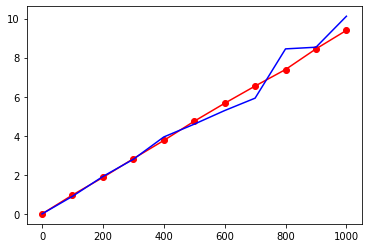

In [0]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

length = 1000
no_elements = 10
force = 1
# parameters for AE/L function###########
mu, sigma = 1000000000, 100000000 # mean and standard deviation
A=0.0001
L=length
E = np.random.normal(mu, sigma, no_elements+1)
#########################################
x = np.arange(0, length, length/no_elements)
x = np.insert(x, no_elements, length)

def AE(x):
    return A*E[x]/L

def _AE(x):
    # return 100.0
    x=int(np.floor(x/(L/no_elements)))
    return A*E[x]/L

AEe = np.vectorize(_AE)
# print(AEe(x))
# print(AE(range(0, no_elements+1)))

def _1DFEM(length, no_elements, force):
    k_global = np.zeros((no_elements+1, no_elements+1))
    for i in range(0, no_elements):
        k_local = (AE(i)/(length/no_elements))*np.array([[1, -1],[-1, 1]])
        k_global[i:i+2,i:i+2]+=k_local
        # as u0=0, we remove 0th row and column while calculation
    f_global = np.zeros((no_elements+1,1))
    f_global[no_elements, 0] = force
    u_global = np.zeros((no_elements+1, 1))
    u_global[1:, 0] = np.linalg.solve(k_global[1:, 1:],f_global[1:, 0])
    f_global = k_global*u_global
    return u_global[0:, 0]

def Exact(length, force, x):
    if(x.any()<=length):
        return force*x/AEe(x)
    else:
        return x*0

fem = _1DFEM(length, no_elements, force)
exact = Exact(length, force, x)
plt.plot(x, fem, 'ro-')
plt.plot(x, exact, 'b-')
fem_a = fem[-1]
exact_a = exact[-1]
# print(fem)
# print(exact)
print("fem: ", fem_a, "exact: ", exact_a)
print("error: ", (abs(fem_a-exact_a)/exact_a)*100, "%")

Here we will vary the young's modulus for each batch. Here also, it follows a normal distribution with mean mu and standard deviation sigma



In [0]:
from google.colab import files

import numpy as np
import scipy as sp
import pandas as pd
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import csv

batch_size=1000
mu, sigma = 1000000000, 100000000 # mean and standard deviation

class beam():
    length = 10
    no_elements = 10
    force = 1
    # parameters for AE/L function###########
    A=0.0001
    L=length
    # E = 1000000000
    #########################################
    x = np.arange(0, length, length/no_elements)
    x = np.insert(x, no_elements, length)

    def set_E(self, Ei):
        self.E = Ei

    def AE(self):
        return self.A*self.E

    def _1DFEM(self, length, no_elements, force):
        k_global = np.zeros((no_elements+1, no_elements+1))
        for i in range(0, no_elements):
            k_local = (self.AE()/(self.L/no_elements))*np.array([[1, -1],[-1, 1]])
            k_global[i:i+2,i:i+2]+=k_local
            # as u0=0, we remove 0th row and column while calculation
        f_global = np.zeros((no_elements+1,1))
        f_global[no_elements, 0] = force
        u_global = np.zeros((no_elements+1, 1))
        u_global[1:, 0] = np.linalg.solve(k_global[1:, 1:],f_global[1:, 0])
        f_global = k_global*u_global
        return u_global[0:, 0]

    def Exact(self, length, force, x):
        if(x.any()<=length):
            return force*x/self.AE()
        else:
            return x*0


Es = np.random.normal(mu, sigma, batch_size)
fems= []
exacts = []
errors = []
for i in range(0, batch_size):
    bi = beam()
    bi.set_E(Es[i])
    fem = bi._1DFEM(bi.length, bi.no_elements, bi.force)
    exact = bi.Exact(bi.length, bi.force, bi.x)
    fem_a = fem[-1]
    exact_a = exact[-1]
    error = (abs(fem_a-exact_a)/exact_a)*100
    fems.append(fem_a)
    exacts.append(exact_a)
    errors.append(error)

df = pd.DataFrame({'Sl. No.': range(1, batch_size+1), 'E':Es, 'By FEM': fems, 'Exact results': exacts, 'Errors':errors})

with open('data.csv', 'w') as f:
    f.write(df.to_csv(index=False))
f.close()

files.download('data.csv') 

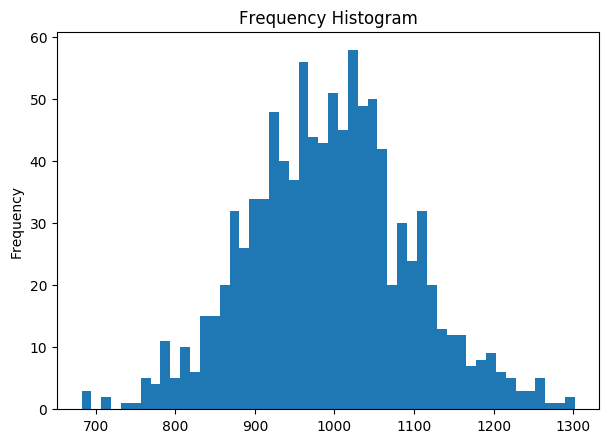

In [0]:
# import numpy as np
# import scipy as sp
# from scipy.stats import norm
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import math

mu = 1000
sigma = 100
batch_size = 1000

Es = np.random.normal(mu, sigma, batch_size)
# # Es.s
# minE = min(Es)
# maxE = max(Es)
# freq = {} 
# for i in range(0, int(np.ceil((maxE-minE)/sigma))):
#     try:
#         freq[int(np.ceil((Es[i]-minE)/sigma))]+=1
#     except KeyError:
#         freq[int(np.ceil((Es[i]-minE)/sigma))]=1
# width = sigma
# plt.bar(freq.keys(), freq.values(), width, color='g')


# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# # We can set the number of bins with the `bins` kwarg
# axs[0].hist(, bins=n_bins)
# axs[1].hist(y, bins=n_bins)


import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(mu, sigma, batch_size)
x.sort()
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.savefig('plot.jpg')
files.download('plot.jpg')


In [0]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


length = 100
no_elements = 10
force = 1
# x = np.arange(0, length, length/no_elements)
# print(x)
# print(len(x))
# print(x.shape)
# x = np.insert(x, no_elements, length)
x=range(0, no_elements+1)
# print(x)
# print(len(x))
# print(x.shape)
# _i = np.vectorize(int)
# print(_i(np.floor(x/length)))

def _AE(x):
    # return 100.0
    mu, sigma = 1000000000, 0.1 # mean and standard deviation
    E = np.random.normal(mu, sigma, no_elements+1)
    A=0.0001
    L=length
    # x=int(np.floor(x))/L
    return A*E[x]/L

AE = np.vectorize(_AE)

print(AE(x))

print(np.floor(33.55))

[1000.00000006  999.99999996 1000.00000001 1000.00000009 1000.00000006
 1000.00000007  999.99999989 1000.00000015 1000.00000011  999.99999988
  999.99999984]
33.0


In [0]:
import numpy as np

a = [33.5, 44.3, 98.8]
print(np.floor(a))
print(a)
# print(int(np.floor(a)))

[33. 44. 98.]
[33.5, 44.3, 98.8]


In [0]:
import numpy as np
b=np.array([[1, -1],[-1,1]])
print(b)
no_elements=3
a = np.zeros((no_elements, no_elements))
aa = np.zeros((1, no_elements+1))
print(aa)
print(a[0:2, 0:2])
print(a)
for i in range(0, no_elements):
    # print('a')
    a[i:i+2,i:i+2]+=b

[[ 1 -1]
 [-1  1]]
[[0. 0. 0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


ValueError: ignored

In [0]:
import numpy as np
print(3*np.array([[1],[2], [3]]))
b=np.array([[1, -1],[-1,1]])
no_elements=3
a = np.zeros((no_elements+1, no_elements+1))
for i in range(0, no_elements):
    a[i:i+2,i:i+2]+=b
print(a[1:, 1:])
f_global = np.zeros((1, no_elements+1))
print(f_global)

[[3]
 [6]
 [9]]
[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  1.]]
[[0. 0. 0. 0.]]


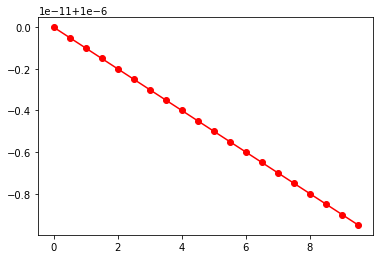

In [0]:
import matplotlib.pyplot as plt
import numpy as np
l=10
x = np.arange(0, l, 0.5)
a=0.0001
b=100
y =  a/(a*x+b)
plt.plot(x, y, 'ro-')


In [0]:
import numpy as np
a = np.array([1, 2, 3])
a = np.insert(a, 3, 0)
print(a)
print(np.zeros((9, 1)).shape)
# print(np.zeros(1, 9).shape())
a = {}
for i in range(0, 10):
    
print(a)

[1 2 3 0]
(9, 1)


KeyError: ignored